## Run some HLS composites for wherever the AOI indicates

In [1]:
!pip install -U -r /projects/Developer/icesat2_boreal/dps/requirements_main.txt
!pip install pystac_client
from platform import python_version
python_version()
import sys
import os
sys.path.append('/projects/icesat2_boreal/lib')
sys.path.append('/projects/Developer/icesat2_boreal/lib')
import ExtractUtils
from pyproj import CRS, Transformer
import geopandas as gpd
import maplib_folium
import pandas as pd

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


/projects/.local/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
!pip install -U plotnine

  Using cached plotnine-0.8.0-py3-none-any.whl (4.7 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached mizani-0.7.3-py3-none-any.whl (63 kB)
  Using cached palettable-3.3.3-py2.py3-none-any.whl (332 kB)
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [154]:
# Create compressed tarball of all files created with final run
MAINDIR = '/projects/test_data/sajama'
!tar -czvf $MAINDIR/sajama_hls_20230608_01.tar.gz $MAINDIR/20230608_01/*

tar: Removing leading `/' from member names
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2016_2016.tif
tar: Removing leading `/' from hard link targets
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2016_2016.tif.msk
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2017_2017.tif
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2017_2017.tif.msk
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2018_2018.tif
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2018_2018.tif.msk
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2019_2019.tif
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2019_2019.tif.msk
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2020_2020.tif
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2020_2020.tif.msk
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2021_2021.tif
/projects/test_data/sajama/20230608_01/HLS_1_06-01_06-30_2021_2021.tif.msk
/projects/test_data/sajama/2023

In [3]:
from plotnine import *

In [64]:
import glob

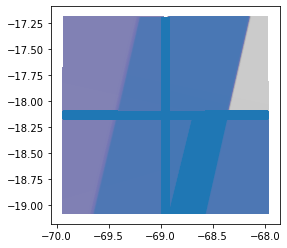

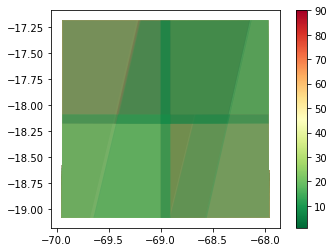

In [100]:
RUN = '20230607_22' #'20230422_20'
gdf_list = []
for fn in glob.glob(f'/projects/test_data/sajama/{RUN}/master_*_HLS.json'):
    with open(fn) as f:
        data = json.load(f)
        gdf = gpd.GeoDataFrame.from_features(data["features"])
        gdf_list.append(gdf)
gdf = pd.concat(gdf_list)
gdf.plot(alpha=0.005)
gdf.plot(column='eo:cloud_cover', alpha=0.25, cmap='RdYlGn_r', legend=True)

In [102]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 849 entries, 0 to 16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   geometry        849 non-null    geometry
 1   eo:cloud_cover  849 non-null    int64   
 2   datetime        849 non-null    object  
 3   start_datetime  849 non-null    object  
 4   end_datetime    849 non-null    object  
dtypes: geometry(1), int64(1), object(3)
memory usage: 39.8+ KB


### Build a df of the HLS metadata

In [125]:
import json
import glob
from pandas.io.json import json_normalize
import geopandas
df_list = []
df_smry_list = []

RUN = '20230607_22' #'20230422_20'
gdf_list = []
for fn in glob.glob(f'/projects/test_data/sajama/{RUN}/master_*_HLS.json'):

    with open(fn) as f:
        #data = pd.read_json(f)
        data = json.load(f)
        df = pd.json_normalize(data, record_path=['features'])
        df['filename'] = os.path.basename(fn)
        df['start'] = os.path.basename(fn).split('_')[2]
        df['end'] = os.path.basename(fn).split('_')[3]
        
        #data = json.load(f)
        gdf = gpd.GeoDataFrame.from_features(data["features"])
        gdf_list.append(gdf)
        
        df_smry = df.groupby(['filename','start','end']).size().reset_index(name='counts')
        df_list.append(df)
        df_smry_list.append(df_smry)

df = pd.concat(df_list)
df_smry = pd.concat(df_smry_list)
df_smry.head()
gdf = pd.concat(gdf_list)

In [126]:
df.head()

type                                  id stac_version  \
0  Feature  HLS.L30.T19KEA.2017152T143504.v2.0        1.0.0   
1  Feature  HLS.S30.T19KEV.2017152T144731.v2.0        1.0.0   
2  Feature  HLS.S30.T19KEA.2017152T144731.v2.0        1.0.0   
3  Feature  HLS.S30.T19KDA.2017152T144731.v2.0        1.0.0   
4  Feature  HLS.S30.T19KDV.2017152T144731.v2.0        1.0.0   

                                     stac_extensions   collection  \
0  [https://stac-extensions.github.io/eo/v1.0.0/s...  HLSL30.v2.0   
1  [https://stac-extensions.github.io/eo/v1.0.0/s...  HLSS30.v2.0   
2  [https://stac-extensions.github.io/eo/v1.0.0/s...  HLSS30.v2.0   
3  [https://stac-extensions.github.io/eo/v1.0.0/s...  HLSS30.v2.0   
4  [https://stac-extensions.github.io/eo/v1.0.0/s...  HLSS30.v2.0   

                                               bbox  \
0  [-69.000189, -18.176925, -67.962018, -17.181809]   
1    [-69.00019, -19.08091, -68.350358, -18.087435]   
2  [-69.000189, -18.176925, -68.143713, -17.182633]   
3  [-69.945899, -18.176924, -68.907713, -17.182257]   
4  [-69.950912, -19.080909, -68.907223, -18.086212]   

                                               links geometry.type  \
0  [{'rel': 'self', 'href': 'https://cmr.earthdat...       Polygon   
1  [{'rel': 'self', 'href': 'https://cmr.earthdat...       Polygon   
2  [{'rel': 'self', 'href': 'https://cmr.earthdat...       Polygon   
3  [{'rel': 'self', 'href': 'https://cmr.earthdat...       Polygon   
4  [{'rel': 'self', 'href': 'https://cmr.earthdat...       Polygon   

                                geometry.coordinates  \
0  [[[-69.0001891, -18.1769249], [-67.9620181, -1...   
1  [[[-69.0001901, -19.08091], [-68.5752851, -19....   
2  [[[-69.0001891, -18.1769249], [-68.3707385, -1...   
3  [[[-68.9077126, -18.1769027], [-68.9082177, -1...   
4  [[[-68.9072234, -19.0808866], [-68.9077589, -1...   

   properties.eo:cloud_cover  ... assets.metadata.type  \
0                         88  ...      application/xml   
1                         63  ...      application/xml   
2                         62  ...      application/xml   
3                         69  ...      application/xml   
4                         51  ...      application/xml   

                                     assets.B12.href  \
0                                                NaN   
1  s3://lp-prod-protected/HLSS30.020/HLS.S30.T19K...   
2  s3://lp-prod-protected/HLSS30.020/HLS.S30.T19K...   
3  s3://lp-prod-protected/HLSS30.020/HLS.S30.T19K...   
4  s3://lp-prod-protected/HLSS30.020/HLS.S30.T19K...   

                                    assets.B12.title  \
0                                                NaN   
1  Download HLS.S30.T19KEV.2017152T144731.v2.0.B1...   
2  Download HLS.S30.T19KEA.2017152T144731.v2.0.B1...   
3  Download HLS.S30.T19KDA.2017152T144731.v2.0.B1...   
4  Download HLS.S30.T19KDV.2017152T144731.v2.0.B1...   

                                     assets.B08.href  \
0                                                NaN   
1  https://data.lpdaac.earthdatacloud.nasa.gov/lp...   
2  https://data.lpdaac.earthdatacloud.nasa.gov/lp...   
3  https://data.lpdaac.earthdatacloud.nasa.gov/lp...   
4  https://data.lpdaac.earthdatacloud.nasa.gov/lp...   

                                    assets.B08.title  \
0                                                NaN   
1  Download HLS.S30.T19KEV.2017152T144731.v2.0.B0...   
2  Download HLS.S30.T19KEA.2017152T144731.v2.0.B0...   
3  Download HLS.S30.T19KDA.2017152T144731.v2.0.B0...   
4  Download HLS.S30.T19KDV.2017152T144731.v2.0.B0...   

                                     assets.B8A.href  \
0                                                NaN   
1  s3://lp-prod-protected/HLSS30.020/HLS.S30.T19K...   
2  s3://lp-prod-protected/HLSS30.020/HLS.S30.T19K...   
3  s3://lp-prod-protected/HLSS30.020/HLS.S30.T19K...   
4  s3://lp-prod-protected/HLSS30.020/HLS.S30.T19K...   

                                    assets.B8A.title  \
0                                

In [127]:
gdf.head()

geometry  eo:cloud_cover  \
0  POLYGON ((-69.00019 -18.17692, -67.96202 -18.1...              88   
1  POLYGON ((-69.00019 -19.08091, -68.57529 -19.0...              63   
2  POLYGON ((-69.00019 -18.17692, -68.37074 -18.1...              62   
3  POLYGON ((-68.90771 -18.17690, -68.90822 -17.1...              69   
4  POLYGON ((-68.90722 -19.08089, -68.90776 -18.0...              51   

                   datetime            start_datetime  \
0  2017-06-01T14:35:04.470Z  2017-06-01T14:35:04.470Z   
1  2017-06-01T14:47:37.060Z  2017-06-01T14:47:37.060Z   
2  2017-06-01T14:47:37.060Z  2017-06-01T14:47:37.060Z   
3  2017-06-01T14:47:37.060Z  2017-06-01T14:47:37.060Z   
4  2017-06-01T14:47:37.060Z  2017-06-01T14:47:37.060Z   

               end_datetime  
0  2017-06-01T14:35:28.408Z  
1  2017-06-01T14:47:37.060Z  
2  2017-06-01T14:47:37.060Z  
3  2017-06-01T14:47:37.060Z  
4  2017-06-01T14:47:37.060Z

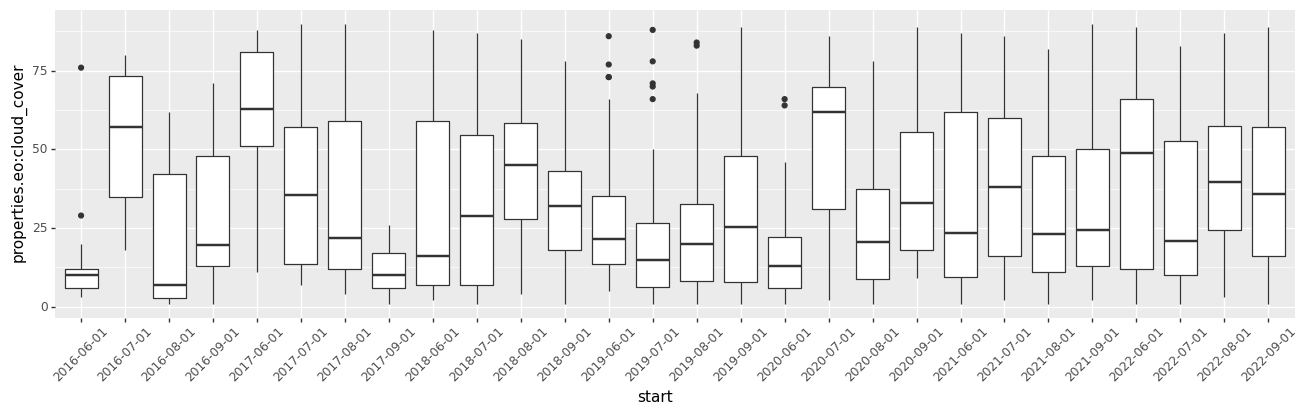

<ggplot: (8780631865565)>

In [18]:
var = 'properties.eo:cloud_cover'
(
    ggplot(data = df)
    #+ geom_point(aes(x='start', y=var))
    + geom_boxplot(aes(x='start', y=var))
    #+ facet_grid('~end')
    + theme(figure_size=(16, 4), axis_text_x=element_text(angle=45))  
)

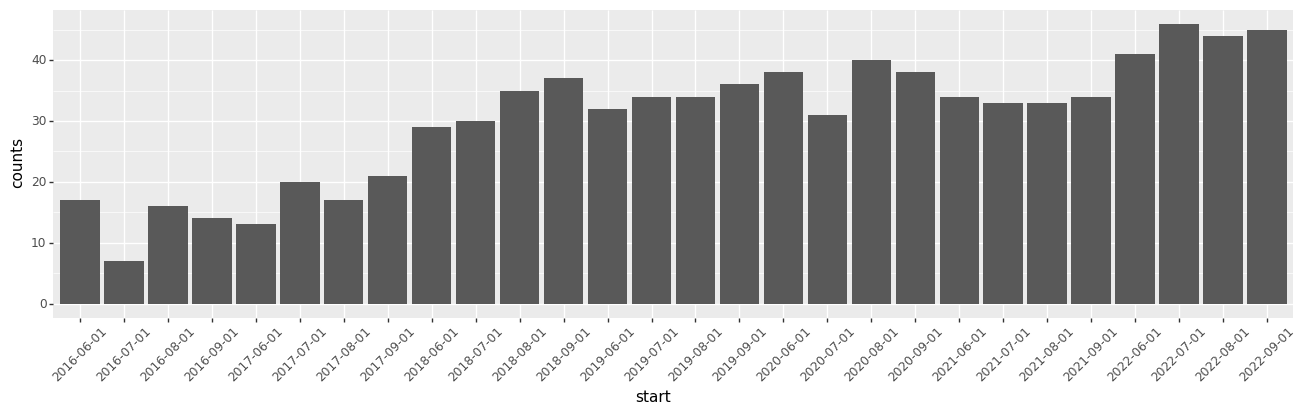

<ggplot: (8780903267853)>

In [19]:
(
    ggplot(data = df_smry)
    + geom_bar(aes(x='start', y='counts'), stat='identity')
    + theme(figure_size=(16, 4), axis_text_x=element_text(angle=45))  
)

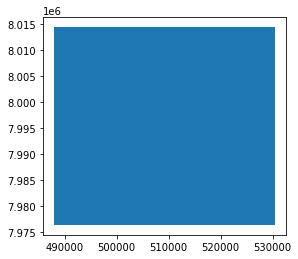

In [4]:
INDEX_FN = '/projects/test_data/sajama/aoi/SajamaAOI.gpkg'

PROJECTED_FN = '/projects/test_data/sajama/aoi/SajamaAOI_utm.gpkg'
gpd.read_file(INDEX_FN).to_crs(32719).to_file(PROJECTED_FN, driver='GPKG')

c = gpd.read_file(PROJECTED_FN)
c.plot()

In [21]:
c.geometry.area/1e6

0    1617.246398
dtype: float64

#### 3.1.2_dps.py

In [6]:
MS_DATA_TYPE = 'HLS'#'LS8' # 'HLS'
if MS_DATA_TYPE == 'LS8':
    SAT_API = 'https://landsatlook.usgs.gov/sat-api'
else:
    SAT_API = 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD'
    

In [7]:
import fiona
from CovariateUtils import *

In [8]:
list(range(2016,2022+1))

[2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [23]:
nowtime = pd.Timestamp.now().strftime('%Y%m%d_%H')
nowtime

'20230608_01'

In [150]:
# Minimum red range for determining a nodatamask. Values less assigned -9999
MIN_RED_LIM = 0.03

# Minimum NDVI value for determining ValidMask 0 or 1; NDVI > MIN_NDVI_THRESH are valid data and get assigned a value of 1
# Using the ValidMask band (0 or 1) can be used as an easy way to apply another nodata assignment downstream - but doesnt bake it in up front.
# Alternatively, can apply a more/less rigorous NDVI mask downstream using the NDVI layer
MIN_NDVI_THRESH = 0

In [151]:
INDEX_FN = PROJECTED_FN

INDEX_LYR = fiona.listlayers(INDEX_FN)[0]
OUTDIR_SAJAMA = f'/projects/test_data/sajama/{nowtime}'
!mkdir -p $OUTDIR_SAJAMA

#for SEASON in ['WET', 'DRY']:
for SEASON in ['DRY']:  
    
    for MONTH in [6,7,8,9]:
        if MONTH == 6 or MONTH == 9:
            DAY_MAX = 30
        else:
            DAY_MAX = 31
        print(f'\n{SEASON}')

        if SEASON is 'WET':
            SEASON_START = '01-01' #'01-01'
            SEASON_STOP = '03-31' #'04-30'
            MAX_CLOUDS = 90
        else:
            SEASON_START = f'0{str(MONTH)}-01'
            SEASON_STOP  = f'0{str(MONTH)}-{str(DAY_MAX)}'
            MAX_CLOUDS = 90

        for YEAR in list(range(2016,2022+1)):

            YEAR = str(YEAR)

            args = f"-i {INDEX_FN} \
            -lyr {INDEX_LYR} \
            -a {SAT_API} \
            --tile_buffer_m 0 \
            --in_tile_num 1 \
            -o {OUTDIR_SAJAMA} \
            -sy {YEAR} -ey {YEAR} -smd {SEASON_START} -emd {SEASON_STOP} -mc {MAX_CLOUDS} \
            --composite_type {MS_DATA_TYPE} \
            --hls_product H30 \
            --rangelims_red {MIN_RED_LIM} 1 \
            --thresh_min_ndvi {MIN_NDVI_THRESH}"# \
            #--search_only"

            cmd = f'python /projects/Developer/icesat2_boreal/lib/3.1.2_dps.py {args}'
            !echo $cmd
            !echo
            !eval $cmd

		Composite
Creating Green Composite
		MaskedFile
		Composite
Creating Red Composite
		MaskedFile
		Composite
Creating NIR Composite
		MaskedFile
		Composite
Creating SWIR Composite
		MaskedFile
		Composite
Creating SWIR2 Composite
		MaskedFile
		Composite
Creating NDVI Composite
Creating Julian Date Comp
Creating Year Date Comp
Generating covariates
	SAVI Created
	MSAVI Created
	NDMI Created
	EVI Created
	NBR Created
	NBR2 Created
	TassCap Created
Calculating X and Y pixel center coords...
Min NDVI value before mask: -0.5555555820465088
Min NDVI threshold: 0.0
	Vegetation mask created: valid data where NDVI > 0.0

Creating raster stack...

Assigning band names:
	['Blue', 'Green', 'Red', 'NIR', 'SWIR', 'SWIR2', 'NDVI', 'SAVI', 'MSAVI', 'NDMI', 'EVI', 'NBR', 'NBR2', 'TCB', 'TCG', 'TCW', 'ValidMask', 'Xgeo', 'Ygeo', 'JulianDate', 'yearDate']

specifying output directory and filename

Apply a common mask across all layers of stack...
Stack shape pre-mask:		(21, 1268, 1416)
Stack shape pos

In [145]:
# !python /projects/Developer/icesat2_boreal/lib/3.1.2_dps.py -i /projects/test_data/sajama/aoi/SajamaAOI_utm.gpkg -lyr SajamaAOI_utm -a https://cmr.earthdata.nasa.gov/stac/LPCLOUD --tile_buffer_m 0 --in_tile_num 1 -o /projects/test_data/sajama/20230608_01 -sy 2016 -ey 2016 -smd 06-01 -emd 06-30 -mc 90 --composite_type HLS --hls_product H30 --rangelims_red 0.03 1 --thresh_min_ndvi 0

In [26]:
import numpy as np

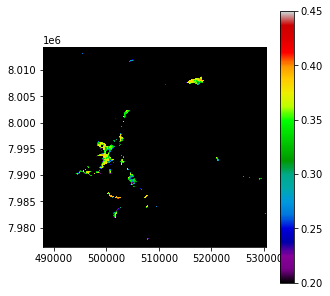

In [76]:
ExtractUtils.map_image_band('/projects/test_data/test_sajama/HLS_1_01-01_04-30_2018_2018.tif')